## Importando librerías

In [ ]:
#Mini Neural network
#Abdel
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Cargando dataset de Fashion MNIST

In [ ]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

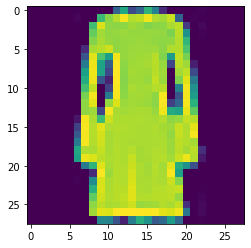

In [ ]:
plt.imshow(train_images[49])

## Limpieza de datos

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

train_labels[0][0]

0.0

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Creando nuestra red neuronal

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compilando la red neuronal

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(type(train_images))
print(type(train_labels))

(60000, 28, 28, 1)
(60000, 10)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Entenando la red

In [ ]:
model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10)

Epoch 1/10
938/938 [==============================] - 86s 89ms/step - loss: 0.5668 - accuracy: 0.7946
Epoch 2/10
938/938 [==============================] - 81s 87ms/step - loss: 0.3957 - accuracy: 0.8582
Epoch 3/10
938/938 [==============================] - 82s 88ms/step - loss: 0.3519 - accuracy: 0.8735
Epoch 4/10
938/938 [==============================] - 80s 85ms/step - loss: 0.3367 - accuracy: 0.8819
Epoch 5/10
938/938 [==============================] - 80s 85ms/step - loss: 0.3242 - accuracy: 0.8844
Epoch 6/10
938/938 [==============================] - 84s 90ms/step - loss: 0.3209 - accuracy: 0.8859
Epoch 7/10
938/938 [==============================] - 81s 86ms/step - loss: 0.3194 - accuracy: 0.8885
Epoch 8/10
938/938 [==============================] - 78s 83ms/step - loss: 0.3160 - accuracy: 0.8887
Epoch 9/10
938/938 [==============================] - 78s 83ms/step - loss: 0.3183 - accuracy: 0.8891
Epoch 10/10
938/938 [==============================] - 76s 81ms/step - loss: 0.322

## Análisis de resultados

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)


In [ ]:
score

[0.2897152602672577, 0.8991000056266785]

## Callbacks

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=1)
model.fit(train_images,
         train_labels,
         batch_size=64,
        callbacks=[early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 76s 81ms/step - loss: 0.3237 - accuracy: 0.8891
Epoch 2/10
938/938 [==============================] - 75s 80ms/step - loss: 0.3245 - accuracy: 0.8895
Epoch 3/10
938/938 [==============================] - 76s 81ms/step - loss: 0.3220 - accuracy: 0.8894


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                verbose=1,
                                  monitor='accuracy',
                                  save_best_only=True)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[checkpoint],
         epochs=10)

Epoch 1/10
937/938 [============================>.] - ETA: 0s - loss: 0.3278 - accuracy: 0.8883
Epoch 1: accuracy improved from -inf to 0.88825, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 75s 80ms/step - loss: 0.3277 - accuracy: 0.8882
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.3267 - accuracy: 0.8894
Epoch 2: accuracy improved from 0.88825 to 0.88943, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 75s 80ms/step - loss: 0.3267 - accuracy: 0.8894
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.3324 - accuracy: 0.8871
Epoch 3: accuracy did not improve from 0.88943
938/938 [==============================] - 75s 80ms/step - loss: 0.3329 - accuracy: 0.8871
Epoch 4/10
937/938 [============================>.] - ETA: 0s - loss: 0.3310 - accuracy: 0.8863
Epoch 4: accuracy did not improve from 0.88943
938/938 [==============================] - 75s 80ms/step - loss: 0.3

In [ ]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [ ]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.4120 - accuracy: 0.8860


[0.41200411319732666, 0.8859999775886536]